In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Print the shape of the data
print(f"Training data shape: {train_images.shape}, Training labels shape: {train_labels.shape}")
print(f"Testing data shape: {test_images.shape}, Testing labels shape: {test_labels.shape}")

Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Testing data shape: (10000, 28, 28), Testing labels shape: (10000,)


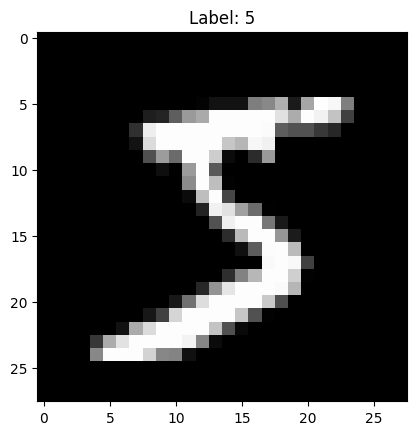

In [4]:
# Display the first image in the training set
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

Step 2: Preprocess the Data

In [5]:
# Normalize the images to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
# Reshape for a fully connected network
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

Step 3: Build my model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

# Create the model
model = Sequential([
    Input(shape=(28 * 28,)),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8970 - loss: 0.3444 - val_accuracy: 0.9705 - val_loss: 0.0962
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9740 - loss: 0.0855 - val_accuracy: 0.9742 - val_loss: 0.0819
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9840 - loss: 0.0527 - val_accuracy: 0.9780 - val_loss: 0.0717
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9894 - loss: 0.0320 - val_accuracy: 0.9789 - val_loss: 0.0678
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9920 - loss: 0.0251 - val_accuracy: 0.9818 - val_loss: 0.0675


In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.9780 - loss: 0.0822
Test accuracy: 0.9818000197410583


In [12]:
model.save('mnist_model.keras')

In [20]:
from tensorflow.keras.models import load_model

model = load_model('mnist_model.keras')

In [34]:
import numpy as np
from PIL import Image

# Load the image
image = Image.open('img_103.jpg')

# Resize the image to 28x28 pixels
image = image.resize((28, 28))

# Convert the image to grayscale (if necessary)
image = image.convert('L')

# Convert the image to a numpy array
image_array = np.array(image)

# Flatten the image
input_image = image_array.flatten()

# Normalize the pixel values
input_image = input_image / 255.0

# Reshape the input image to match the model's input shape
input_image = input_image.reshape(1, 28 * 28)

# Now, input_image is preprocessed and ready to be fed into your model for inference

In [35]:
# Assuming `input_image` is the preprocessed image
predictions = model.predict(input_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [36]:
predicted_digit = np.argmax(predictions)

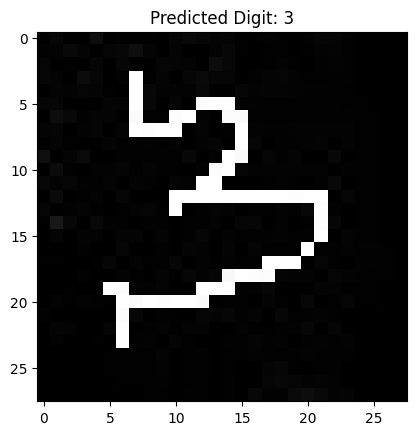

In [37]:
plt.imshow(input_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.show()